In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./archive/Google_Stock_Price_Train.csv', sep=",")
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [3]:
col_names = list(data.columns)
for i in range(1, len(col_names)):
    for idx in data.index:
        v = data.loc[idx, col_names[i]]
        if type(v) is str:
            data.loc[idx, col_names[i]] = v.replace(",", "")

In [4]:
data["Open"] = pd.to_numeric( data["Open"] )
data["Close"] = pd.to_numeric( data["Close"] )

data["High"] = pd.to_numeric( data["High"] )
data["Low"] = pd.to_numeric( data["Low"] )

data["Volume"] = pd.to_numeric( data["Volume"] )

In [6]:
data["Open"]

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [7]:
data["Close"]

0       663.59
1       666.45
2       657.21
3       648.24
4       620.76
         ...  
1253    789.91
1254    791.55
1255    785.05
1256    782.79
1257    771.82
Name: Close, Length: 1258, dtype: float64

In [8]:
data["High"]

0       332.83
1       333.87
2       330.75
3       328.77
4       322.29
         ...  
1253    792.74
1254    797.86
1255    794.23
1256    785.93
1257    782.78
Name: High, Length: 1258, dtype: float64

In [9]:
data["Low"]

0       324.97
1       329.08
2       326.89
3       323.68
4       309.46
         ...  
1253    787.28
1254    787.66
1255    783.20
1256    778.92
1257    770.41
Name: Low, Length: 1258, dtype: float64

In [10]:
data["Volume"]

0        7380500
1        5749400
2        6590300
3        5405900
4       11688800
          ...   
1253      623400
1254      789100
1255     1153800
1256      744300
1257     1770000
Name: Volume, Length: 1258, dtype: int64

In [11]:
data = data.loc[:, ["Open", "Close", "High", "Low", "Volume"]].values

train = data[:len(data)-50]
val = data[len(train):] # last 50 rows will be our validation data

In [12]:
train

array([[3.2525e+02, 6.6359e+02, 3.3283e+02, 3.2497e+02, 7.3805e+06],
       [3.3127e+02, 6.6645e+02, 3.3387e+02, 3.2908e+02, 5.7494e+06],
       [3.2983e+02, 6.5721e+02, 3.3075e+02, 3.2689e+02, 6.5903e+06],
       ...,
       [7.7980e+02, 7.7996e+02, 7.8585e+02, 7.7750e+02, 1.0930e+06],
       [7.8785e+02, 7.9526e+02, 8.0161e+02, 7.8557e+02, 2.0569e+06],
       [7.9824e+02, 8.0150e+02, 8.0460e+02, 7.9803e+02, 1.7668e+06]])

In [13]:
val

array([[8.0330e+02, 7.9697e+02, 8.0397e+02, 7.9603e+02, 1.7575e+06],
       [7.9500e+02, 7.9937e+02, 7.9950e+02, 7.9400e+02, 1.2662e+06],
       [8.0490e+02, 8.1311e+02, 8.1518e+02, 8.0482e+02, 1.6975e+06],
       [8.1668e+02, 8.0767e+02, 8.1668e+02, 8.0514e+02, 1.5764e+06],
       [8.0634e+02, 7.9907e+02, 8.0698e+02, 7.9632e+02, 1.6477e+06],
       [8.0100e+02, 7.9535e+02, 8.0349e+02, 7.9150e+02, 2.7492e+06],
       [8.0835e+02, 7.9537e+02, 8.1549e+02, 7.9359e+02, 4.2699e+06],
       [7.9547e+02, 7.8454e+02, 7.9686e+02, 7.8400e+02, 2.4273e+06],
       [7.8289e+02, 7.8361e+02, 7.8949e+02, 7.7554e+02, 2.4064e+06],
       [7.7820e+02, 7.6870e+02, 7.8165e+02, 7.6345e+02, 1.8724e+06],
       [7.6725e+02, 7.6213e+02, 7.6995e+02, 7.5903e+02, 1.9432e+06],
       [7.5066e+02, 7.6202e+02, 7.7036e+02, 7.5056e+02, 2.1348e+06],
       [7.7450e+02, 7.8252e+02, 7.8519e+02, 7.7255e+02, 1.5851e+06],
       [7.8340e+02, 7.9051e+02, 7.9563e+02, 7.8019e+02, 1.3669e+06],
       [7.7994e+02, 7.8531e+02, 7.

In [14]:
print(train.shape)

(1208, 5)


In [16]:
print(val.shape)

(50, 5)


# Open to Open

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [36]:
train_open = train[:, 0].reshape(train.shape[0], 1)
train_open

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [779.8 ],
       [787.85],
       [798.24]])

In [37]:
train_open_scaled = scaler.fit_transform(train_open)
train_open_scaled

array([[0.08886192],
       [0.10045847],
       [0.09768454],
       ...,
       [0.96447835],
       [0.97998536],
       [1.        ]])

In [38]:
timesteps = 50

train_open_X = []
train_open_y = []

for i in range(timesteps, train_open_scaled.shape[0]):
    train_open_X.append(train_open_scaled[i-timesteps:i, 0])
    train_open_y.append(train_open_scaled[i, 0])

train_open_X = np.array(train_open_X)
train_open_y = np.array(train_open_y)

In [39]:
print(train_open_X.shape)

(1158, 50)


In [40]:
print(train_open_y.shape)

(1158,)


In [41]:
train_open_scaled[0:50, 0]

array([0.08886192, 0.10045847, 0.09768454, 0.0948143 , 0.08267838,
       0.06661273, 0.06062182, 0.06801896, 0.0632609 , 0.06875096,
       0.06360764, 0.07740022, 0.02897211, 0.02463785, 0.02494606,
       0.01648944, 0.01117275, 0.01001695, 0.01700955, 0.02174834,
       0.02361689, 0.02353984, 0.02910695, 0.03326784, 0.04492218,
       0.04634767, 0.04960317, 0.04563492, 0.04813916, 0.04914085,
       0.05047003, 0.04076129, 0.04284173, 0.04178225, 0.04954538,
       0.04478733, 0.04511481, 0.0443828 , 0.04765757, 0.0559023 ,
       0.05942749, 0.05917707, 0.05767453, 0.04578903, 0.0467522 ,
       0.0476961 , 0.04569271, 0.03806442, 0.04646325, 0.05245415])

In [42]:
# Reshaping
train_open_X = train_open_X.reshape(train_open_X.shape[0], timesteps, 1)  # Dimension of array is 3.

In [43]:
train_open_X.shape

(1158, 50, 1)

In [45]:
inputs = data[len(data) - len(val) - timesteps:, 0]
inputs = inputs.reshape(inputs.shape[0], 1)
inputs = scaler.transform(inputs)
inputs

array([[0.97208738],
       [0.9744953 ],
       [0.96775312],
       [0.97208738],
       [0.96544152],
       [0.95970103],
       [0.96488288],
       [0.95523193],
       [0.95189937],
       [0.95615657],
       [0.94671752],
       [0.93982124],
       [0.94367391],
       [0.94317306],
       [0.9443096 ],
       [0.9398405 ],
       [0.94415549],
       [0.95139852],
       [0.95224611],
       [0.96486362],
       [0.96214748],
       [0.94579288],
       [0.91695562],
       [0.93496687],
       [0.92558561],
       [0.93190399],
       [0.94511866],
       [0.95026198],
       [0.94367391],
       [0.9507243 ],
       [0.96486362],
       [0.97755818],
       [0.97014178],
       [0.9561951 ],
       [0.96072199],
       [0.96763754],
       [0.95779396],
       [0.95378718],
       [0.95721606],
       [0.96353444],
       [0.96293728],
       [0.96420866],
       [0.9604523 ],
       [0.97769302],
       [0.97210664],
       [0.96721375],
       [0.96804207],
       [0.964

In [46]:
val_open_X = []
for i in range(timesteps, inputs.shape[0]):
    val_open_X.append(inputs[i-timesteps:i, 0])
    
val_open_X = np.array(val_open_X)
val_open_X = val_open_X.reshape(val_open_X.shape[0], timesteps, 1)

In [47]:
val_open_X.shape

(50, 50, 1)

# RNN

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [66]:
# Initialising the RNN
regressor = Sequential()

regressor.add(
    SimpleRNN(units = 100, 
              activation='relu', 
              return_sequences = True, 
              input_shape = (timesteps, 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [ ]:
# Fitting the RNN to the Training set
regressor.fit(train_open_X, train_open_y, epochs = 200, batch_size = 8)

In [49]:
val_predict = regressor.predict(val_open_X)
val_predict = scaler.inverse_transform(val_predict)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [50]:
val_predict.shape

(50, 1)

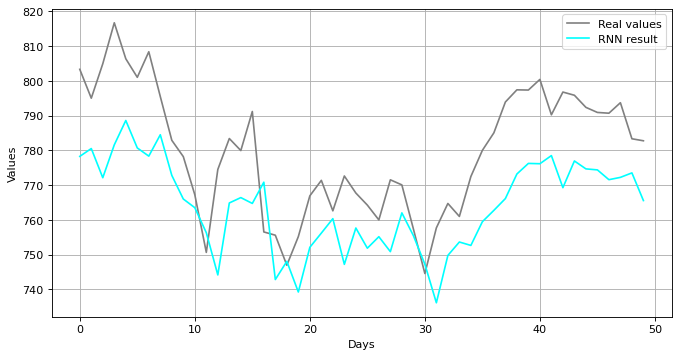

In [52]:
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(val[:, 0], color="gray", label="Real values")
plt.plot(val_predict, color="cyan", label="RNN result")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [54]:
from sklearn.metrics import mean_squared_error

mean_squared_error(val[:, 0], val_predict)

346.54009669294237

In [76]:
regressor = Sequential()

regressor.add(
    SimpleRNN(units = 100, 
              activation='relu', 
              return_sequences = True, 
              input_shape = (timesteps, 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
regressor.fit(train_open_X, train_open_y, epochs = 500, batch_size = 8)

Epoch 1/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0605
Epoch 2/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104
Epoch 3/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073
Epoch 4/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047
Epoch 5/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044
Epoch 6/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043
Epoch 7/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035
Epoch 8/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032
Epoch 9/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027
Epoch 10/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030
Epoch 11/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023
Epoch 12/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028
Epoch 13/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0024
Epoch 14/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023
Epoch 15/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1

145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0013
Epoch 81/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 82/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 83/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010
Epoch 84/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0013
Epoch 85/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0012
Epoch 86/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 87/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 88/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.9581e-04
Epoch 89/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 90/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0014
Epoch 91/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 92/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 93/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 94/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1

145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.3284e-04
Epoch 159/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 160/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 161/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010
Epoch 162/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 163/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 164/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 165/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010
Epoch 166/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0012
Epoch 167/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.4822e-04
Epoch 168/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 169/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.1432e-04
Epoch 170/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 171/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 172/500
145/145 

145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.9726e-04
Epoch 236/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 237/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.8108e-04
Epoch 238/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 239/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010
Epoch 240/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.6361e-04
Epoch 241/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010
Epoch 242/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 243/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.3879e-04
Epoch 244/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.0187e-04
Epoch 245/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.8778e-04
Epoch 246/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010
Epoch 247/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010
Epoch 248/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.7697e-04
Epoch 

145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 313/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010
Epoch 314/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 315/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 316/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 317/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.3756e-04
Epoch 318/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.9622e-04
Epoch 319/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 320/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010
Epoch 321/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 322/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010
Epoch 323/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.3785e-04
Epoch 324/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010
Epoch 325/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 326/500
145/145 

145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.4582e-04
Epoch 390/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.9567e-04
Epoch 391/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 392/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.7677e-04
Epoch 393/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 394/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.4782e-04
Epoch 395/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.4208e-04
Epoch 396/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010
Epoch 397/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.6420e-04
Epoch 398/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.8339e-04
Epoch 399/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.0255e-04
Epoch 400/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 401/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 402/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Ep

145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.5795e-04
Epoch 467/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.7850e-04
Epoch 468/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0012
Epoch 469/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010
Epoch 470/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.8322e-04
Epoch 471/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 472/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0011
Epoch 473/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010
Epoch 474/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.3229e-04
Epoch 475/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.0437e-04
Epoch 476/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.6532e-04
Epoch 477/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.9298e-04
Epoch 478/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0010
Epoch 479/500
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.7889e-04
Ep

In [78]:
val_predict = regressor.predict(val_open_X)
val_predict = scaler.inverse_transform(val_predict)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


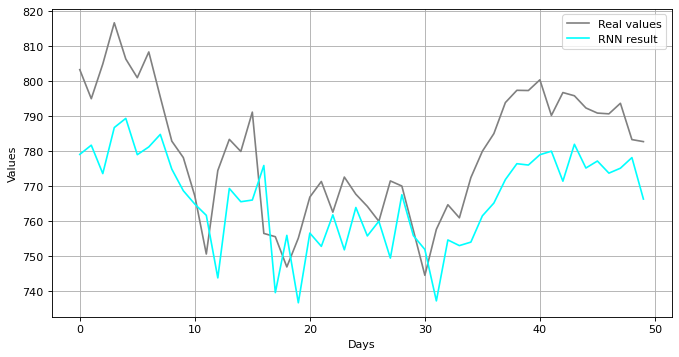

In [57]:
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(val[:, 0], color="gray", label="Real values")
plt.plot(val_predict, color="cyan", label="RNN result")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [79]:
mean_squared_error(val[:, 0], val_predict)

290.5286798442292

In [80]:
regressor = Sequential()

regressor.add(
    SimpleRNN(units = 100, 
              activation='relu', 
              return_sequences = True, 
              input_shape = (timesteps, 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
regressor.fit(train_open_X, train_open_y, epochs = 500, batch_size = 16)

Epoch 1/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1355
Epoch 2/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0203
Epoch 3/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0124
Epoch 4/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0088
Epoch 5/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0073
Epoch 6/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060
Epoch 7/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0055
Epoch 8/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0051
Epoch 9/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0052
Epoch 10/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0038
Epoch 11/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0037
Epoch 12/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0035
Epoch 13/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0037
Epoch 14/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0033
Epoch 15/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031
Epoc

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 83/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 84/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 85/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 86/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015
Epoch 87/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 88/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 89/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 90/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 91/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 92/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 93/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 94/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 95/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 96/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 97

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.9540e-04
Epoch 163/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.7690e-04
Epoch 164/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010    
Epoch 165/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 166/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 167/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 168/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 169/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.7282e-04
Epoch 170/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.1164e-04
Epoch 171/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 172/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0010
Epoch 173/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010
Epoch 174/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.9391e-04
Epoch 175/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.8154e-04
Epoch 176/500
73/73 ━━━━━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010 
Epoch 241/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010   
Epoch 242/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 243/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010
Epoch 244/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.2548e-04
Epoch 245/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.0421e-04
Epoch 246/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 247/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010
Epoch 248/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.6140e-04
Epoch 249/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.9759e-04
Epoch 250/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 251/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010
Epoch 252/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.7670e-04
Epoch 253/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010
Epoch 254/500
73/73 ━━━━━━━━━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.3833e-04
Epoch 319/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.5813e-04
Epoch 320/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.7836e-04
Epoch 321/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.6061e-04
Epoch 322/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.3963e-04
Epoch 323/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.1145e-04
Epoch 324/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.3515e-04
Epoch 325/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0010
Epoch 326/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.0764e-04
Epoch 327/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.8298e-04
Epoch 328/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0010
Epoch 329/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.0725e-04
Epoch 330/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0010
Epoch 331/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.6456e-04
Epoch 332/500

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.1024e-04
Epoch 397/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0010
Epoch 398/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.3303e-04
Epoch 399/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0010
Epoch 400/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.7724e-04
Epoch 401/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.8274e-04
Epoch 402/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.7474e-04
Epoch 403/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.1727e-04
Epoch 404/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.4208e-04
Epoch 405/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010
Epoch 406/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.7460e-04
Epoch 407/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.3832e-04
Epoch 408/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.6281e-04
Epoch 409/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.9666e-04
Epoch 410/500
73/7

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.0074e-04
Epoch 474/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.4230e-04
Epoch 475/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.3859e-04
Epoch 476/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.6330e-04
Epoch 477/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.5769e-04
Epoch 478/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010
Epoch 479/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.8041e-04
Epoch 480/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.8131e-04
Epoch 481/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.2155e-04
Epoch 482/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.8919e-04
Epoch 483/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.7272e-04
Epoch 484/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.3521e-04
Epoch 485/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.4851e-04
Epoch 486/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010
Epoch 487/500


In [82]:
val_predict_16 = regressor.predict(val_open_X)
val_predict_16 = scaler.inverse_transform(val_predict_16)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [83]:
mean_squared_error(val[:, 0], val_predict_16)

110.72677309640514

In [84]:
regressor = Sequential()

regressor.add(
    SimpleRNN(units = 100, 
              activation='relu', 
              return_sequences = True, 
              input_shape = (timesteps, 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [85]:
regressor.fit(train_open_X, train_open_y, epochs = 500, batch_size = 32)

Epoch 1/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1181
Epoch 2/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0247
Epoch 3/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0128
Epoch 4/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0121
Epoch 5/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0090
Epoch 6/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0079
Epoch 7/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0062
Epoch 8/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0065
Epoch 9/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0050
Epoch 10/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0043
Epoch 11/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0049
Epoch 12/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0048
Epoch 13/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0042
Epoch 14/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038
Epoch 15/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - lo

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013
Epoch 82/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014
Epoch 83/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013
Epoch 84/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014
Epoch 85/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013
Epoch 86/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012
Epoch 87/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013
Epoch 88/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012
Epoch 89/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015
Epoch 90/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013
Epoch 91/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0014
Epoch 92/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 
Epoch 93/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012
Epoch 94/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013
Epoch 95/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0011
Epoch 162/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0011
Epoch 163/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 164/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 165/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.4874e-04
Epoch 166/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.1790e-04
Epoch 167/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.6578e-04
Epoch 168/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011
Epoch 169/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.4821e-04
Epoch 170/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.8670e-04
Epoch 171/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 172/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.6346e-04
Epoch 173/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.5129e-04
Epoch 174/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010
Epoch 175/500
37/37 ━━━━

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010
Epoch 240/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.2453e-04
Epoch 241/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 242/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.7067e-04
Epoch 243/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 244/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.9998e-04
Epoch 245/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.2336e-04
Epoch 246/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.3255e-04
Epoch 247/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013
Epoch 248/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 249/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010
Epoch 250/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.3870e-04
Epoch 251/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.2892e-04
Epoch 252/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.5709e-04
Epoch 253/500
37/3

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.0512e-04
Epoch 317/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.6307e-04
Epoch 318/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.2913e-04
Epoch 319/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.3405e-04
Epoch 320/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.4510e-04
Epoch 321/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.7687e-04
Epoch 322/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.4177e-04
Epoch 323/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.2269e-04
Epoch 324/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.4422e-04 
Epoch 325/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010 
Epoch 326/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.8308e-04
Epoch 327/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.3387e-04
Epoch 328/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.0343e-04
Epoch 329/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010 
Epoch

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.0385e-04
Epoch 394/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.9469e-04
Epoch 395/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.6204e-04
Epoch 396/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.9114e-04
Epoch 397/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.1691e-04
Epoch 398/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.5042e-04
Epoch 399/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.2196e-04
Epoch 400/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8182e-04
Epoch 401/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.5432e-04
Epoch 402/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.2195e-04
Epoch 403/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.5062e-04
Epoch 404/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9164e-04
Epoch 405/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.8502e-04 
Epoch 406/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.1616e-04


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.1176e-04
Epoch 471/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.7647e-04
Epoch 472/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.3342e-04
Epoch 473/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.0290e-04
Epoch 474/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.2812e-04
Epoch 475/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.4304e-04
Epoch 476/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.2687e-04
Epoch 477/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.3412e-04
Epoch 478/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.7948e-04
Epoch 479/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.1597e-04
Epoch 480/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.1327e-04
Epoch 481/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010
Epoch 482/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.5310e-04
Epoch 483/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010
Epo

In [86]:
val_predict_32 = regressor.predict(val_open_X)
val_predict_32 = scaler.inverse_transform(val_predict_32)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [87]:
mean_squared_error(val[:, 0], val_predict_32)

268.9411007726627

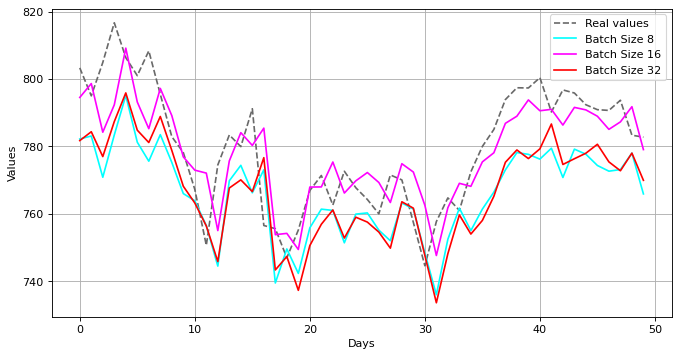

In [89]:
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(val[:, 0], color="DimGray", label="Real values", linestyle="dashed")
plt.plot(val_predict, color="Cyan", label="Batch Size 8")
plt.plot(val_predict_16, color="Magenta",label="Batch Size 16")
plt.plot(val_predict_32, color="Red", label="Batch Size 32")


plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [90]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 100, 
                        activation='tanh', 
                        return_sequences = True, 
                        input_shape = (timesteps, 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [91]:
# Fitting the RNN to the Training set
regressor.fit(train_open_X, train_open_y, epochs = 500, batch_size = 16)

Epoch 1/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3349
Epoch 2/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0374
Epoch 3/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0198
Epoch 4/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0146
Epoch 5/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0101
Epoch 6/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090
Epoch 7/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0098
Epoch 8/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0076
Epoch 9/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0081
Epoch 10/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0063
Epoch 11/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0061
Epoch 12/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0046
Epoch 13/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0047
Epoch 14/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043
Epoch 15/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0044
Epoc

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 83/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.9247e-04
Epoch 84/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 85/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.8195e-04
Epoch 86/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.5433e-04
Epoch 87/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.1608e-04
Epoch 88/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 89/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 90/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.2954e-04
Epoch 91/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.8687e-04
Epoch 92/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.8045e-04
Epoch 93/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 94/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.9218e-04
Epoch 95/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 96/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.5791e-04
Epoch 161/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.8505e-04
Epoch 162/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.4422e-04
Epoch 163/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.4577e-04
Epoch 164/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.3970e-04
Epoch 165/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.1684e-04
Epoch 166/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.6087e-04
Epoch 167/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.1201e-04
Epoch 168/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 169/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 170/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 171/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.1360e-04
Epoch 172/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.6693e-04
Epoch 173/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.2931e-04
Epoch 174/500
73/7

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 238/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.8143e-04
Epoch 239/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.3925e-04
Epoch 240/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0010
Epoch 241/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.9151e-04
Epoch 242/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010
Epoch 243/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.7983e-04
Epoch 244/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.1971e-04
Epoch 245/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0010
Epoch 246/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.7524e-04
Epoch 247/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.1174e-04
Epoch 248/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.8235e-04
Epoch 249/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.9039e-04
Epoch 250/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.4731e-04
Epoch 251/500
73/73 ━

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.0268e-04
Epoch 315/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0010
Epoch 316/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.6726e-04
Epoch 317/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.9949e-04
Epoch 318/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0700
Epoch 319/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0392
Epoch 320/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0302
Epoch 321/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0272
Epoch 322/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0089
Epoch 323/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0040
Epoch 324/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0040
Epoch 325/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0038
Epoch 326/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027
Epoch 327/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027
Epoch 328/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/st

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 395/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 396/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 397/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 398/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 399/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 400/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017
Epoch 401/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0017
Epoch 402/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018
Epoch 403/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 404/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 405/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 406/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 407/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 408/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.2193e-04
Epoch 474/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.1431e-04
Epoch 475/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.9591e-04
Epoch 476/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 477/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.5870e-04
Epoch 478/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0010
Epoch 479/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.3950e-04
Epoch 480/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.0229e-04
Epoch 481/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 482/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.8602e-04
Epoch 483/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.4059e-04
Epoch 484/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.2338e-04
Epoch 485/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.0657e-04
Epoch 486/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 487/500
73/73 ━━

In [92]:
val_predict_tanh = regressor.predict(val_open_X)
val_predict_tanh = scaler.inverse_transform(val_predict_tanh)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


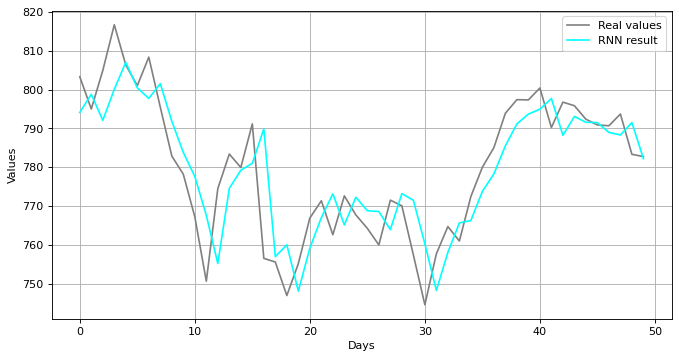

In [94]:
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(val[:, 0], color="gray", label="Real values")
plt.plot(val_predict_tanh, color="cyan", label="RNN result")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [93]:
mean_squared_error(val[:, 0], val_predict_tanh)

92.46404615428914

In [95]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 100, 
                        activation='sigmoid', 
                        return_sequences = True, 
                        input_shape = (timesteps, 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [96]:
# Fitting the RNN to the Training set
regressor.fit(train_open_X, train_open_y, epochs = 500, batch_size = 16)

Epoch 1/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3584
Epoch 2/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2219
Epoch 3/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1672
Epoch 4/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1182
Epoch 5/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0755
Epoch 6/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0668
Epoch 7/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0483
Epoch 8/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0400
Epoch 9/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0328
Epoch 10/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0277
Epoch 11/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0309
Epoch 12/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0243
Epoch 13/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0230
Epoch 14/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0191
Epoch 15/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178
Epoc

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025
Epoch 83/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026
Epoch 84/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022
Epoch 85/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024
Epoch 86/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0026
Epoch 87/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0029
Epoch 88/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024
Epoch 89/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026
Epoch 90/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023
Epoch 91/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035
Epoch 92/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025
Epoch 93/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023
Epoch 94/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024
Epoch 95/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026
Epoch 96/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024
Epoch 9

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019
Epoch 163/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 164/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018
Epoch 165/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018
Epoch 166/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020
Epoch 167/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019
Epoch 168/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 169/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020
Epoch 170/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018
Epoch 171/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018
Epoch 172/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 173/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018
Epoch 174/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020
Epoch 175/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017
Epoch 176/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 243/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015
Epoch 244/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019
Epoch 245/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 246/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015
Epoch 247/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 248/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 249/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 250/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 251/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 252/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019
Epoch 253/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018
Epoch 254/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 255/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0017
Epoch 256/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 323/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 324/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 325/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 326/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 327/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 328/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 329/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 330/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 331/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018
Epoch 332/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 333/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016
Epoch 334/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 335/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 336/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016
Epoch 403/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0015
Epoch 404/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013
Epoch 405/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0013
Epoch 406/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 407/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 408/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015
Epoch 409/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015
Epoch 410/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 411/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 412/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 413/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 414/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 415/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010  
Epoch 416/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - lo

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 483/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015
Epoch 484/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 485/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 486/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 487/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 488/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 489/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 490/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 491/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 492/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 493/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 494/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 495/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 496/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0

In [97]:
val_predict_sig = regressor.predict(val_open_X)
val_predict_sig = scaler.inverse_transform(val_predict_sig)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [98]:
mean_squared_error(val[:, 0], val_predict_sig)

247.3596615994321

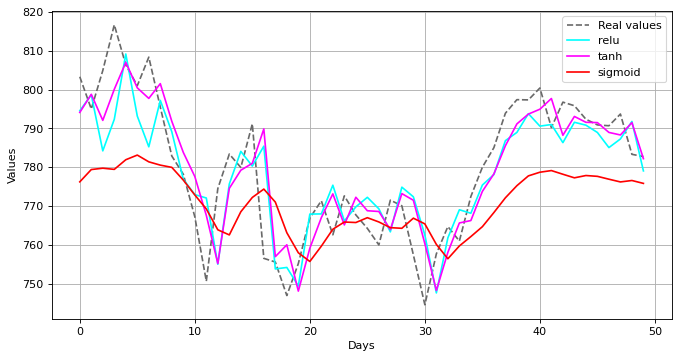

In [99]:
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(val[:, 0], color="DimGray", label="Real values", linestyle="dashed")
plt.plot(val_predict_16, color="Cyan", label="relu")
plt.plot(val_predict_tanh, color="Magenta",label="tanh")
plt.plot(val_predict_sig, color="Red", label="sigmoid")


plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [100]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 100, 
                        activation='tanh', 
                        return_sequences = True, 
                        input_shape = (timesteps, 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'sgd', loss = 'mean_squared_error')

/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [101]:
# Fitting the RNN to the Training set
regressor.fit(train_open_X, train_open_y, epochs = 500, batch_size = 16)

Epoch 1/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2809
Epoch 2/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0581
Epoch 3/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0338
Epoch 4/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0260
Epoch 5/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0205
Epoch 6/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0183
Epoch 7/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0164
Epoch 8/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155
Epoch 9/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0147
Epoch 10/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0113
Epoch 11/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0117
Epoch 12/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0099
Epoch 13/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0107
Epoch 14/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0101
Epoch 15/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090
Epoc

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024
Epoch 83/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025
Epoch 84/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026
Epoch 85/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027
Epoch 86/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0024
Epoch 87/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027
Epoch 88/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021
Epoch 89/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022
Epoch 90/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023
Epoch 91/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025
Epoch 92/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028
Epoch 93/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024
Epoch 94/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023
Epoch 95/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025
Epoch 96/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028
Epoch 97

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017
Epoch 163/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015
Epoch 164/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017
Epoch 165/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 166/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 167/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015
Epoch 168/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016
Epoch 169/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017
Epoch 170/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017
Epoch 171/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017
Epoch 172/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018
Epoch 173/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017
Epoch 174/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017
Epoch 175/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016
Epoch 176/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 243/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013
Epoch 244/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014
Epoch 245/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 246/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 247/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015
Epoch 248/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014
Epoch 249/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014
Epoch 250/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 251/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014
Epoch 252/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0015
Epoch 253/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 254/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 255/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014
Epoch 256/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
Epoch 323/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015
Epoch 324/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013
Epoch 325/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014
Epoch 326/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013
Epoch 327/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013
Epoch 328/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014
Epoch 329/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 330/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 331/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014
Epoch 332/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
Epoch 333/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014
Epoch 334/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 335/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 336/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 403/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013
Epoch 404/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013
Epoch 405/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 406/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 407/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0012
Epoch 408/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 409/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 410/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 411/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 412/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
Epoch 413/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 414/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 415/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 416/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
Epoch 483/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 484/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 485/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 486/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012
Epoch 487/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010
Epoch 488/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 489/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010
Epoch 490/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010  
Epoch 491/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0010   
Epoch 492/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 493/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 494/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011
Epoch 495/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011
Epoch 496/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - lo

In [102]:
val_predict_sgd = regressor.predict(val_open_X)
val_predict_sgd = scaler.inverse_transform(val_predict_sgd)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [103]:
mean_squared_error(val[:, 0], val_predict_sgd)

135.88668398446006

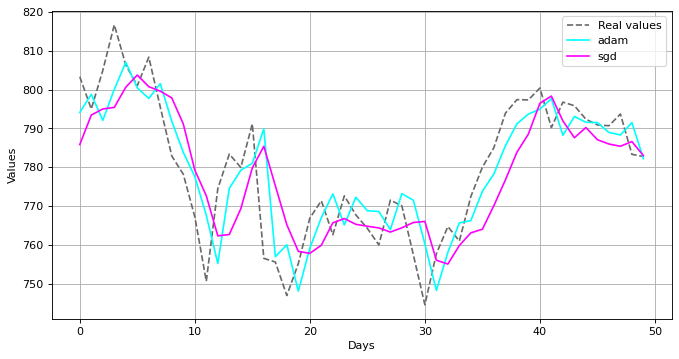

In [104]:
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(val[:, 0], color="DimGray", label="Real values", linestyle="dashed")
plt.plot(val_predict_tanh, color="Cyan", label="adam")
plt.plot(val_predict_sgd, color="Magenta",label="sgd")


plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [105]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 100, 
                        activation='tanh', 
                        return_sequences = True, 
                        input_shape = (timesteps, 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, 
                        activation='tanh', 
                        return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [106]:
# Fitting the RNN to the Training set
regressor.fit(train_open_X, train_open_y, epochs = 500, batch_size = 16)

Epoch 1/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3776
Epoch 2/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1972
Epoch 3/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0866
Epoch 4/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0464
Epoch 5/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0283
Epoch 6/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0241
Epoch 7/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0219
Epoch 8/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0179
Epoch 9/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0116
Epoch 10/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0118
Epoch 11/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0102
Epoch 12/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0104
Epoch 13/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0081
Epoch 14/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0075
Epoch 15/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - lo

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013
Epoch 82/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015
Epoch 83/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 84/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 85/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 86/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 87/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016
Epoch 88/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 89/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013
Epoch 90/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014
Epoch 91/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013
Epoch 92/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015
Epoch 93/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011
Epoch 94/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 95/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 161/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 162/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.9866e-04
Epoch 163/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 164/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 165/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 166/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 167/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 168/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.7418e-04
Epoch 169/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010
Epoch 170/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013
Epoch 171/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013
Epoch 172/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013
Epoch 173/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011
Epoch 174/500
73/73 ━━━━━━━━━━━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 240/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 241/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011
Epoch 242/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013
Epoch 243/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 244/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011
Epoch 245/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 246/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 247/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 248/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 249/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012
Epoch 250/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.5813e-04
Epoch 251/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.7920e-04
Epoch 252/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010
Epoch 253/500
73/73 ━━━━━━━━━━━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 318/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 319/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 320/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 321/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010
Epoch 322/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 323/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013
Epoch 324/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0011
Epoch 325/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.1951e-04
Epoch 326/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012
Epoch 327/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 328/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.9816e-04
Epoch 329/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013
Epoch 330/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.8737e-04
Epoch 331/500
73/73 ━━━━━━━━━━━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 397/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018
Epoch 398/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 399/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015
Epoch 400/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016
Epoch 401/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015
Epoch 402/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 403/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016
Epoch 404/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016
Epoch 405/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017
Epoch 406/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0016
Epoch 407/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012
Epoch 408/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0015
Epoch 409/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014
Epoch 410/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016
Epoch 476/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016
Epoch 477/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010
Epoch 478/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011
Epoch 479/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020
Epoch 480/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013
Epoch 481/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 482/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 483/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021
Epoch 484/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 485/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012
Epoch 486/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013
Epoch 487/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013
Epoch 488/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 489/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms

In [107]:
val_predict_layer = regressor.predict(val_open_X)
val_predict_layer = scaler.inverse_transform(val_predict_layer)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


In [108]:
mean_squared_error(val[:, 0], val_predict_layer)

246.92250805491668

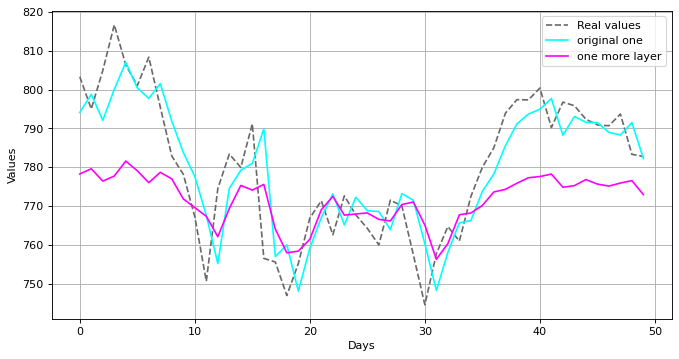

In [109]:
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(val[:, 0], color="DimGray", label="Real values", linestyle="dashed")
plt.plot(val_predict_tanh, color="Cyan", label="original one")
plt.plot(val_predict_layer, color="Magenta",label="one more layer")


plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [127]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 150, 
                        activation='tanh', 
                        return_sequences = True, 
                        input_shape = (timesteps, 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [128]:
# Fitting the RNN to the Training set
regressor.fit(train_open_X, train_open_y, epochs = 100, batch_size = 16)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2656
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0377
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0201
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0152
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0112
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0092
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0081
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0074
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0062
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0068
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0051
Epoch 12/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0049
Epoch 13/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0042
Epoch 14/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0044
Epoch 15/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0040
E

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.9568e-04
Epoch 82/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.9547e-04
Epoch 83/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012
Epoch 84/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.6219e-04
Epoch 85/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.2467e-04
Epoch 86/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.5758e-04
Epoch 87/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.1902e-04
Epoch 88/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.0609e-04
Epoch 89/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012
Epoch 90/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.5920e-04
Epoch 91/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011
Epoch 92/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011
Epoch 93/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.0601e-04
Epoch 94/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012
Epoch 95/100
73/73 ━━━━━━━━━━━━━━━━━━

In [129]:
val_predict_150 = regressor.predict(val_open_X)
val_predict_150 = scaler.inverse_transform(val_predict_150)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [131]:
mean_squared_error(val[:, 0], val_predict_150)

122.06452204108103

In [114]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 50, 
                        activation='tanh', 
                        return_sequences = True, 
                        input_shape = (timesteps, 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [115]:
# Fitting the RNN to the Training set
regressor.fit(train_open_X, train_open_y, epochs = 500, batch_size = 16)

Epoch 1/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1552
Epoch 2/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205
Epoch 3/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143
Epoch 4/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104
Epoch 5/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105
Epoch 6/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083
Epoch 7/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067
Epoch 8/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066
Epoch 9/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063
Epoch 10/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042
Epoch 11/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040
Epoch 12/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038
Epoch 13/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037
Epoch 14/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036
Epoch 15/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035
Epoc

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012
Epoch 83/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012
Epoch 84/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 85/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 86/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 
Epoch 87/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010
Epoch 88/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 89/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 90/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7097e-04
Epoch 91/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7934e-04
Epoch 92/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5380e-04
Epoch 93/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8506e-04
Epoch 94/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 95/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 96/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.5076e-04
Epoch 162/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 163/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010
Epoch 164/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 165/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.3709e-04
Epoch 166/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010
Epoch 167/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0588e-04
Epoch 168/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010
Epoch 169/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8002e-04
Epoch 170/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9914e-04
Epoch 171/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2460e-04
Epoch 172/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2468e-04
Epoch 173/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.9136e-04
Epoch 174/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.0553e-04
Epoch 175/500
73/73 ━━━━━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4775e-04
Epoch 240/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 241/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9008e-04
Epoch 242/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 243/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010
Epoch 244/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1228e-04
Epoch 245/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4907e-04
Epoch 246/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4089e-04
Epoch 247/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7485e-04
Epoch 248/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1950e-04
Epoch 249/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9453e-04
Epoch 250/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0139e-04
Epoch 251/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 252/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6633e-04
Epoch 253/500
73/73 ━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010
Epoch 318/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8618e-04
Epoch 319/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 320/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9992e-04
Epoch 321/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1949e-04
Epoch 322/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9821e-04
Epoch 323/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.4971e-04
Epoch 324/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1284e-04
Epoch 325/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011
Epoch 326/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8445e-04
Epoch 327/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6674e-04
Epoch 328/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7469e-04
Epoch 329/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010
Epoch 330/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2561e-04
Epoch 331/500
73/73 ━━

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5422e-04
Epoch 395/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.0594e-04
Epoch 396/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9782e-04
Epoch 397/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7704e-04
Epoch 398/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1332e-04
Epoch 399/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.9396e-04
Epoch 400/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8297e-04
Epoch 401/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.8629e-04
Epoch 402/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7056e-04
Epoch 403/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.3693e-04
Epoch 404/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7196e-04
Epoch 405/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4901e-04
Epoch 406/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9823e-04
Epoch 407/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7281e-04
Epoch 

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7223e-04
Epoch 472/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2761e-04
Epoch 473/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.1579e-04
Epoch 474/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.6664e-04
Epoch 475/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1540e-04
Epoch 476/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8308e-04
Epoch 477/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7600e-04
Epoch 478/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4603e-04
Epoch 479/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3546e-04
Epoch 480/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.7547e-04
Epoch 481/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.3067e-04
Epoch 482/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9769e-04
Epoch 483/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.0130e-04
Epoch 484/500
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6039e-04
Epoch 

In [117]:
val_predict_50 = regressor.predict(val_open_X)
val_predict_50 = scaler.inverse_transform(val_predict_50)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [118]:
mean_squared_error(val[:, 0], val_predict_50)

600.7936006160515

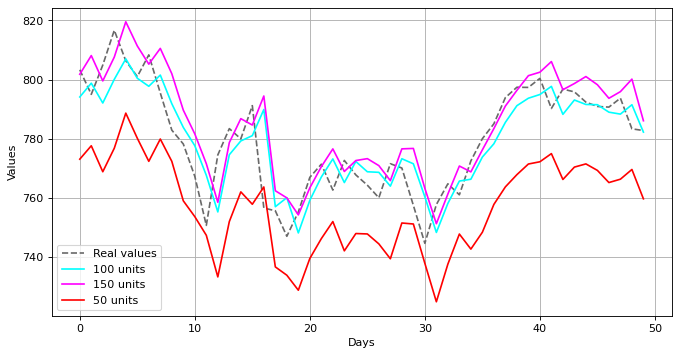

In [130]:
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(val[:, 0], color="DimGray", label="Real values", linestyle="dashed")
plt.plot(val_predict_tanh, color="Cyan", label="100 units")
plt.plot(val_predict_150, color="Magenta",label="150 units")
plt.plot(val_predict_50, color="Red", label="50 units")


plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

# Open to Open LSTM

In [132]:
from keras.layers import LSTM

In [133]:
model = Sequential()
model.add(LSTM(10, input_shape = (None,1) ) ) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [134]:
model.fit(train_open_X, train_open_y, epochs = 100, batch_size = 2)

Epoch 1/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0416
Epoch 2/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0010
Epoch 3/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.1506e-04
Epoch 4/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.9514e-04
Epoch 5/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.6980e-04
Epoch 6/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1363e-04
Epoch 7/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.6763e-04
Epoch 8/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.3036e-04
Epoch 9/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.3582e-04
Epoch 10/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.7309e-04
Epoch 11/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1857e-04
Epoch 12/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8660e-04
Epoch 13/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.2473e-04
Epoch 14/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1960

579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.9124e-04
Epoch 78/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2272e-04
Epoch 79/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5466e-04
Epoch 80/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8312e-04
Epoch 81/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5710e-04
Epoch 82/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8664e-04
Epoch 83/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9732e-04
Epoch 84/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6615e-04
Epoch 85/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5092e-04
Epoch 86/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9729e-04
Epoch 87/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8292e-04
Epoch 88/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.3000e-04
Epoch 89/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3462e-04
Epoch 90/100
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.

In [135]:
predicted_lstm = model.predict(val_open_X)
predicted_lstm = scaler.inverse_transform(predicted_lstm)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [136]:
mean_squared_error(val[:, 0], predicted_lstm)

110.6738637270974

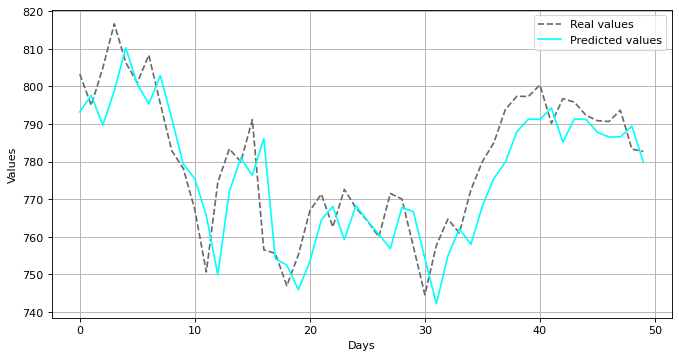

In [137]:
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(val[:, 0], color="DimGray", label="Real values", linestyle="dashed")
plt.plot(predicted_lstm, color="Cyan", label="Predicted values")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [138]:
model = Sequential()
model.add(LSTM(10, input_shape = (None,1) ) ) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [139]:
model.fit(train_open_X, train_open_y, epochs = 200, batch_size = 2)

Epoch 1/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0075
Epoch 2/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7.2965e-04
Epoch 3/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.9874e-04
Epoch 4/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.8459e-04
Epoch 5/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.0308e-04
Epoch 6/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6480e-04
Epoch 7/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.2164e-04
Epoch 8/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.2149e-04
Epoch 9/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.3304e-04
Epoch 10/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5594e-04
Epoch 11/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2428e-04
Epoch 12/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6647e-04
Epoch 13/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4821e-04
Epoch 14/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.

579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8649e-04
Epoch 78/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4311e-04
Epoch 79/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1673e-04
Epoch 80/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0623e-04
Epoch 81/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1356e-04
Epoch 82/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7222e-04
Epoch 83/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7034e-04
Epoch 84/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5445e-04
Epoch 85/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2744e-04
Epoch 86/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4526e-04
Epoch 87/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0439e-04
Epoch 88/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2791e-04
Epoch 89/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8717e-04
Epoch 90/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.

579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.3029e-04
Epoch 154/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.6461e-04
Epoch 155/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.1244e-04
Epoch 156/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2668e-04
Epoch 157/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7656e-04
Epoch 158/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9174e-04
Epoch 159/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.6001e-04
Epoch 160/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.1821e-04
Epoch 161/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8100e-04
Epoch 162/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0569e-04
Epoch 163/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8563e-04
Epoch 164/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2411e-04
Epoch 165/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5860e-04
Epoch 166/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st

In [140]:
predicted_lstm_200 = model.predict(val_open_X)
predicted_lstm_200 = scaler.inverse_transform(predicted_lstm_200)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [144]:
mean_squared_error(val[:, 0], predicted_lstm_200)

96.86412636476025

In [142]:
model = Sequential()
model.add(LSTM(10, input_shape = (None,1) ) ) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [143]:
model.fit(train_open_X, train_open_y, epochs = 50, batch_size = 2)

Epoch 1/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0634
Epoch 2/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013
Epoch 3/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0010
Epoch 4/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.6893e-04
Epoch 5/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2891e-04
Epoch 6/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5058e-04
Epoch 7/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.2703e-04
Epoch 8/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.9987e-04
Epoch 9/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.3202e-04
Epoch 10/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1910e-04
Epoch 11/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1109e-04
Epoch 12/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2036e-04
Epoch 13/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0259e-04
Epoch 14/50
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3244e-04
Epoch 15/50
5

In [145]:
predicted_lstm_50 = model.predict(val_open_X)
predicted_lstm_50 = scaler.inverse_transform(predicted_lstm_50)
mean_squared_error(val[:, 0], predicted_lstm_50)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


109.00723063834474

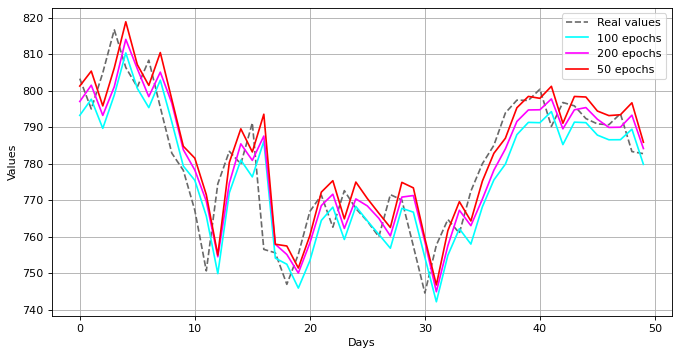

In [146]:
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(val[:, 0], color="DimGray", label="Real values", linestyle="dashed")
plt.plot(predicted_lstm, color="Cyan", label="100 epochs")
plt.plot(predicted_lstm_200, color="Magenta",label="200 epochs")
plt.plot(predicted_lstm_50, color="Red", label="50 epochs")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [147]:
model = Sequential()
model.add(LSTM(10, input_shape = (None,1) ) ) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [148]:
model.fit(train_open_X, train_open_y, epochs = 200, batch_size = 4)

Epoch 1/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0615
Epoch 2/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0014
Epoch 3/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0012
Epoch 4/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0015
Epoch 5/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.9859e-04
Epoch 6/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.7860e-04
Epoch 7/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.7749e-04
Epoch 8/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.1806e-04
Epoch 9/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011
Epoch 10/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.5489e-04
Epoch 11/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.1562e-04
Epoch 12/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.5503e-04
Epoch 13/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.8787e-04
Epoch 14/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.8520e-04
Epoch 1

290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3217e-04
Epoch 78/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1168e-04
Epoch 79/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9884e-04
Epoch 80/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7884e-04
Epoch 81/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2128e-04
Epoch 82/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0318e-04
Epoch 83/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6659e-04
Epoch 84/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6851e-04
Epoch 85/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2766e-04
Epoch 86/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2569e-04
Epoch 87/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7702e-04
Epoch 88/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2530e-04
Epoch 89/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7807e-04
Epoch 90/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.

290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2924e-04
Epoch 154/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1490e-04
Epoch 155/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9982e-04
Epoch 156/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2453e-04
Epoch 157/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4804e-04
Epoch 158/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7284e-04
Epoch 159/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4419e-04
Epoch 160/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3497e-04
Epoch 161/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7803e-04
Epoch 162/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2403e-04
Epoch 163/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5349e-04
Epoch 164/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5341e-04
Epoch 165/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4443e-04
Epoch 166/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/st

In [149]:
predicted_lstm_4 = model.predict(val_open_X)
predicted_lstm_4 = scaler.inverse_transform(predicted_lstm_4)
mean_squared_error(val[:, 0], predicted_lstm_4)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


97.94956029077635

In [150]:
model = Sequential()
model.add(LSTM(10, input_shape = (None,1) ) ) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(train_open_X, train_open_y, epochs = 200, batch_size = 8)

Epoch 1/200


/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0889
Epoch 2/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0017
Epoch 3/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015
Epoch 4/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015
Epoch 5/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012
Epoch 6/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013
Epoch 7/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013
Epoch 8/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011
Epoch 9/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0010
Epoch 10/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.5081e-04
Epoch 11/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.7285e-04
Epoch 12/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.5364e-04
Epoch 13/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.9505e-04
Epoch 14/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.0981e-04
Epoch 15/200
145/145 ━━━━━━━━━━━━━━

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9275e-04
Epoch 79/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6449e-04
Epoch 80/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6866e-04
Epoch 81/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8361e-04
Epoch 82/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.4559e-04
Epoch 83/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2185e-04
Epoch 84/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8641e-04
Epoch 85/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7488e-04
Epoch 86/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2016e-04
Epoch 87/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3388e-04
Epoch 88/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.9479e-04
Epoch 89/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1501e-04
Epoch 90/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0078e-04
Epoch 91/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.

145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6677e-04
Epoch 155/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.4219e-04
Epoch 156/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0324e-04
Epoch 157/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5327e-04
Epoch 158/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7137e-04
Epoch 159/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3246e-04
Epoch 160/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8126e-04
Epoch 161/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8731e-04
Epoch 162/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0398e-04
Epoch 163/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.0591e-04
Epoch 164/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.8138e-04
Epoch 165/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9705e-04
Epoch 166/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.5249e-04
Epoch 167/200
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/st

In [151]:
predicted_lstm_8 = model.predict(val_open_X)
predicted_lstm_8 = scaler.inverse_transform(predicted_lstm_8)
mean_squared_error(val[:, 0], predicted_lstm_8)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


98.15606383671627

In [152]:
model = Sequential()
model.add(LSTM(10, input_shape = (None,1) ) ) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(train_open_X, train_open_y, epochs = 200, batch_size = 1)

Epoch 1/200


/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0142
Epoch 2/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.1258e-04
Epoch 3/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 7.7905e-04
Epoch 4/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6.4313e-04
Epoch 5/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.7201e-04
Epoch 6/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.0526e-04
Epoch 7/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 5.3658e-04
Epoch 8/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.7173e-04
Epoch 9/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.3208e-04
Epoch 10/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.6765e-04
Epoch 11/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.4515e-04
Epoch 12/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.0524e-04
Epoch 13/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.7005e-04
Epoch 14/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms

1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.2696e-04
Epoch 77/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.8691e-04
Epoch 78/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.6230e-04
Epoch 79/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.2254e-04
Epoch 80/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.2985e-04
Epoch 81/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.6618e-04
Epoch 82/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.4431e-04
Epoch 83/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.7102e-04
Epoch 84/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.5094e-04
Epoch 85/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.0230e-04
Epoch 86/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.8448e-04
Epoch 87/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.1528e-04
Epoch 88/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.2143e-04
Epoch 89/200
1158/1158 ━━━━━━━━━━━━━━━

1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.0400e-04
Epoch 151/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.8342e-04
Epoch 152/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.9659e-04
Epoch 153/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.6056e-04
Epoch 154/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.9810e-04
Epoch 155/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.7997e-04
Epoch 156/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.0535e-04
Epoch 157/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.5404e-04
Epoch 158/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.9271e-04
Epoch 159/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.8632e-04
Epoch 160/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.3677e-04
Epoch 161/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.7340e-04
Epoch 162/200
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.8629e-04
Epoch 163/200
1158/1158 ━━

In [153]:
predicted_lstm_1 = model.predict(val_open_X)
predicted_lstm_1 = scaler.inverse_transform(predicted_lstm_1)
mean_squared_error(val[:, 0], predicted_lstm_1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


97.9746386191206

In [155]:
model = Sequential()
model.add(LSTM(10, input_shape = (None,1), activation = "relu" ) ) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(train_open_X, train_open_y, epochs = 200, batch_size = 2)

Epoch 1/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0457
Epoch 2/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.9319e-04
Epoch 3/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.3196e-04
Epoch 4/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.3479e-04
Epoch 5/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.0827e-04
Epoch 6/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0059e-04
Epoch 7/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2412e-04
Epoch 8/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.1160e-04
Epoch 9/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1903e-04
Epoch 10/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.8227e-04
Epoch 11/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.7650e-04
Epoch 12/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7266e-04
Epoch 13/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6205e-04
Epoch 14/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.

579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2903e-04
Epoch 78/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9594e-04
Epoch 79/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7374e-04
Epoch 80/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.1168e-04
Epoch 81/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.0609e-04
Epoch 82/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.9032e-04
Epoch 83/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2970e-04
Epoch 84/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9819e-04
Epoch 85/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9236e-04
Epoch 86/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8217e-04
Epoch 87/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0766e-04
Epoch 88/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5861e-04
Epoch 89/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7728e-04
Epoch 90/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.

579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5195e-04
Epoch 154/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.1589e-04
Epoch 155/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9963e-04
Epoch 156/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2358e-04
Epoch 157/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4709e-04
Epoch 158/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.9364e-04
Epoch 159/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1766e-04
Epoch 160/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7884e-04
Epoch 161/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4261e-04
Epoch 162/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0786e-04
Epoch 163/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6368e-04
Epoch 164/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3192e-04
Epoch 165/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2951e-04
Epoch 166/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/st

In [156]:
predicted_lstm_relu = model.predict(val_open_X)
predicted_lstm_relu = scaler.inverse_transform(predicted_lstm_relu)
mean_squared_error(val[:, 0], predicted_lstm_relu)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


131.96209790139667

In [157]:
model = Sequential()
model.add(LSTM(10, input_shape = (None,1), activation = "sigmoid" ) ) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(train_open_X, train_open_y, epochs = 200, batch_size = 2)

Epoch 1/200


/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1226
Epoch 2/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0225
Epoch 3/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7971e-04
Epoch 4/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5230e-04
Epoch 5/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.0249e-04
Epoch 6/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.7179e-04
Epoch 7/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.1759e-04
Epoch 8/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.7530e-04
Epoch 9/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5983e-04
Epoch 10/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.4982e-04
Epoch 11/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5138e-04
Epoch 12/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6942e-04
Epoch 13/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.7109e-04
Epoch 14/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5504e-04
Epoch 1

579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.3560e-04
Epoch 78/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2378e-04
Epoch 79/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.7150e-04
Epoch 80/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3970e-04
Epoch 81/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.4000e-04
Epoch 82/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.7830e-04
Epoch 83/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.0687e-04
Epoch 84/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2330e-04
Epoch 85/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.7667e-04
Epoch 86/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4201e-04
Epoch 87/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8406e-04
Epoch 88/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.0772e-04
Epoch 89/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2922e-04
Epoch 90/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.

579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3278e-04
Epoch 154/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0782e-04
Epoch 155/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9661e-04
Epoch 156/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7898e-04
Epoch 157/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5229e-04
Epoch 158/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8563e-04
Epoch 159/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6391e-04
Epoch 160/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7777e-04
Epoch 161/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4979e-04
Epoch 162/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.0815e-04
Epoch 163/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8639e-04
Epoch 164/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.1809e-04
Epoch 165/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0354e-04
Epoch 166/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

In [158]:
predicted_lstm_sig = model.predict(val_open_X)
predicted_lstm_sig = scaler.inverse_transform(predicted_lstm_sig)
mean_squared_error(val[:, 0], predicted_lstm_sig)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


97.4873477094965

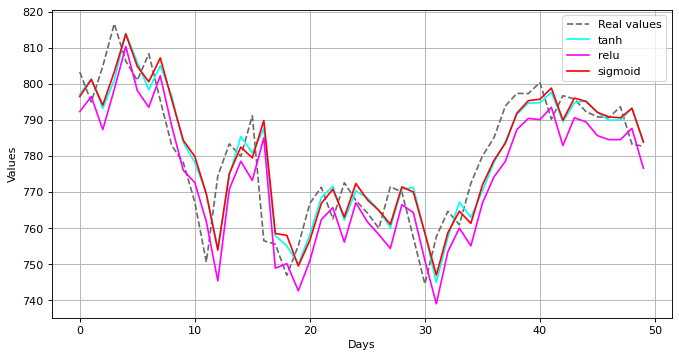

In [159]:
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(val[:, 0], color="DimGray", label="Real values", linestyle="dashed")
plt.plot(predicted_lstm_200, color="Cyan", label="tanh")
plt.plot(predicted_lstm_relu, color="Magenta",label="relu")
plt.plot(predicted_lstm_sig, color="Red", label="sigmoid")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [160]:
model = Sequential()
model.add(LSTM(5, input_shape = (None,1) ) ) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(train_open_X, train_open_y, epochs = 200, batch_size = 2)

Epoch 1/200


/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2376
Epoch 2/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027
Epoch 3/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0022
Epoch 4/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0017
Epoch 5/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018
Epoch 6/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014
Epoch 7/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013
Epoch 8/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013
Epoch 9/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.3866e-04
Epoch 10/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.9015e-04
Epoch 11/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.9757e-04
Epoch 12/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.9850e-04
Epoch 13/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.6433e-04
Epoch 14/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.9549e-04
Epoch 15/200
579/579 ━━━━━━━━━━

579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.7221e-04
Epoch 79/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7179e-04
Epoch 80/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1568e-04
Epoch 81/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8844e-04
Epoch 82/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.7476e-04
Epoch 83/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.4014e-04
Epoch 84/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8207e-04
Epoch 85/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2548e-04
Epoch 86/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8612e-04
Epoch 87/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.6796e-04
Epoch 88/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8087e-04
Epoch 89/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.3691e-04
Epoch 90/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6785e-04
Epoch 91/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.

579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1071e-04
Epoch 155/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7058e-04
Epoch 156/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4956e-04
Epoch 157/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6731e-04
Epoch 158/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5373e-04
Epoch 159/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9722e-04
Epoch 160/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3804e-04
Epoch 161/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7797e-04
Epoch 162/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0919e-04
Epoch 163/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5137e-04
Epoch 164/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1131e-04
Epoch 165/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7708e-04
Epoch 166/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2426e-04
Epoch 167/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

In [161]:
predicted_lstm_5 = model.predict(val_open_X)
predicted_lstm_5 = scaler.inverse_transform(predicted_lstm_5)
mean_squared_error(val[:, 0], predicted_lstm_5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


98.23603180995153

In [162]:
model = Sequential()
model.add(LSTM(20, input_shape = (None,1) ) ) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(train_open_X, train_open_y, epochs = 200, batch_size = 2)

Epoch 1/200


/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0184
Epoch 2/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012
Epoch 3/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0010
Epoch 4/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.3237e-04
Epoch 5/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.5625e-04
Epoch 6/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.2927e-04
Epoch 7/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9919e-04
Epoch 8/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.0405e-04
Epoch 9/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.4119e-04
Epoch 10/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0240e-04
Epoch 11/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8550e-04
Epoch 12/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.7891e-04
Epoch 13/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4441e-04
Epoch 14/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0682e-04
Epoch 15/20

579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.3840e-04
Epoch 78/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.9909e-04
Epoch 79/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.0223e-04
Epoch 80/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0765e-04
Epoch 81/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9116e-04
Epoch 82/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0971e-04
Epoch 83/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9460e-04
Epoch 84/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0633e-04
Epoch 85/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9486e-04
Epoch 86/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.7025e-04
Epoch 87/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.1360e-04
Epoch 88/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4503e-04
Epoch 89/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7876e-04
Epoch 90/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.

579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.7874e-04
Epoch 154/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3870e-04
Epoch 155/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5880e-04
Epoch 156/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8159e-04
Epoch 157/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6736e-04
Epoch 158/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.5181e-04
Epoch 159/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.7103e-04
Epoch 160/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8534e-04
Epoch 161/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.4763e-04
Epoch 162/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.1734e-04
Epoch 163/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8421e-04
Epoch 164/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.7479e-04
Epoch 165/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3173e-04
Epoch 166/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/st

In [163]:
predicted_lstm_20 = model.predict(val_open_X)
predicted_lstm_20 = scaler.inverse_transform(predicted_lstm_20)
mean_squared_error(val[:, 0], predicted_lstm_20)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


131.23799254514745

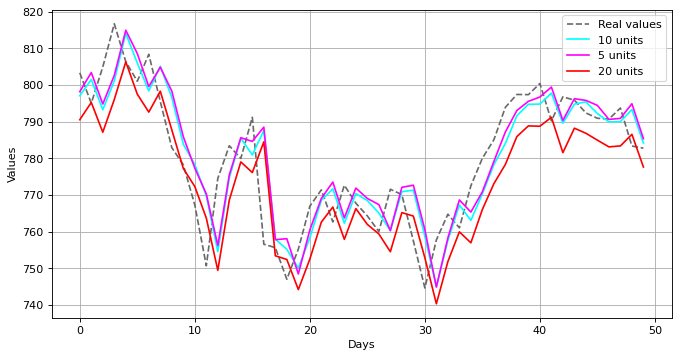

In [164]:
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(val[:, 0], color="DimGray", label="Real values", linestyle="dashed")
plt.plot(predicted_lstm_200, color="Cyan", label="10 units")
plt.plot(predicted_lstm_5, color="Magenta",label="5 units")
plt.plot(predicted_lstm_20, color="Red", label="20 units")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [165]:
model = Sequential()
model.add(LSTM(10, input_shape = (None,1), recurrent_activation = "tanh") ) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(train_open_X, train_open_y, epochs = 200, batch_size = 2)

Epoch 1/200


/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1133
Epoch 2/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.4363e-04
Epoch 3/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.9210e-04
Epoch 4/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.0619e-04
Epoch 5/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7798e-04
Epoch 6/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8184e-04
Epoch 7/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8676e-04
Epoch 8/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1183e-04
Epoch 9/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.7553e-04
Epoch 10/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7640e-04
Epoch 11/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8645e-04
Epoch 12/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9208e-04
Epoch 13/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.0994e-04
Epoch 14/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.1707e-04
Epo

579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0153e-04
Epoch 78/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9513e-04
Epoch 79/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.7574e-04
Epoch 80/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5641e-04
Epoch 81/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1340e-04
Epoch 82/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8241e-04
Epoch 83/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.0823e-04
Epoch 84/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.8684e-04
Epoch 85/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6280e-04
Epoch 86/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1444e-04
Epoch 87/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5382e-04
Epoch 88/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2388e-04
Epoch 89/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5781e-04
Epoch 90/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.

579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8428e-04
Epoch 154/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9144e-04
Epoch 155/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6063e-04
Epoch 156/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3386e-04
Epoch 157/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.9667e-04
Epoch 158/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7829e-04
Epoch 159/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1258e-04
Epoch 160/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7967e-04
Epoch 161/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7462e-04
Epoch 162/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4828e-04
Epoch 163/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1676e-04
Epoch 164/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7901e-04
Epoch 165/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2281e-04
Epoch 166/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

In [166]:
predicted_lstm_ra_tanh = model.predict(val_open_X)
predicted_lstm_ra_tanh = scaler.inverse_transform(predicted_lstm_ra_tanh)
mean_squared_error(val[:, 0], predicted_lstm_ra_tanh)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step


116.74423492557578

In [167]:
model = Sequential()
model.add(LSTM(10, input_shape = (None,1), recurrent_activation = "relu") ) # We want to add 10 LSTM block. One layer has 10 LSTM unit (node).
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(train_open_X, train_open_y, epochs = 200, batch_size = 2)

Epoch 1/200


/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1628
Epoch 2/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013
Epoch 3/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.0282e-04
Epoch 4/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.4107e-04
Epoch 5/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.8588e-04
Epoch 6/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.7858e-04
Epoch 7/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.5263e-04
Epoch 8/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.7551e-04
Epoch 9/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.1043e-04
Epoch 10/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.1612e-04
Epoch 11/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.2229e-04
Epoch 12/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.9414e-04
Epoch 13/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.7202e-04
Epoch 14/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3492e-04
Epoch 1

579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2044e-04
Epoch 78/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.1547e-04
Epoch 79/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1535e-04
Epoch 80/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7973e-04
Epoch 81/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1676e-04
Epoch 82/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.6123e-04
Epoch 83/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.9181e-04
Epoch 84/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2601e-04
Epoch 85/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6781e-04
Epoch 86/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.8785e-04
Epoch 87/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.0215e-04
Epoch 88/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4731e-04
Epoch 89/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.6642e-04
Epoch 90/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.

579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0329e-04
Epoch 154/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4476e-04
Epoch 155/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1271e-04
Epoch 156/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.7541e-04
Epoch 157/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.8926e-04
Epoch 158/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8641e-04
Epoch 159/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6389e-04
Epoch 160/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2746e-04
Epoch 161/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3458e-04
Epoch 162/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1474e-04
Epoch 163/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8812e-04
Epoch 164/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5355e-04
Epoch 165/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6508e-04
Epoch 166/200
579/579 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/st

In [169]:
predicted_lstm_ra_relu = model.predict(val_open_X)
predicted_lstm_ra_relu = scaler.inverse_transform(predicted_lstm_ra_relu)
mean_squared_error(val[:, 0], predicted_lstm_ra_relu)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


111.34471169637912

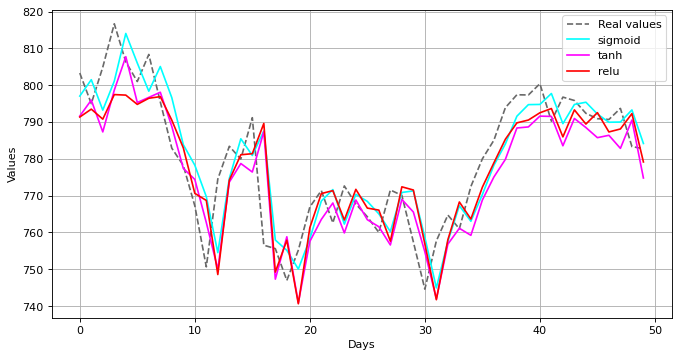

In [170]:
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(val[:, 0], color="DimGray", label="Real values", linestyle="dashed")
plt.plot(predicted_lstm_200, color="Cyan", label="sigmoid")
plt.plot(predicted_lstm_ra_tanh, color="Magenta",label="tanh")
plt.plot(predicted_lstm_ra_relu, color="Red", label="relu")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

# GRU

In [171]:
from keras.layers import GRU

In [173]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(
    GRU(units=50, 
        return_sequences=True, 
        input_shape=(timesteps, 1), 
        activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Second GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# The output layer
regressorGRU.add(Dense(units=1))

# fitting the model
regressorGRU.compile(loss='mean_squared_error', optimizer='adam')
regressorGRU.fit(train_open_X, 
                 train_open_y, 
                 epochs = 100, 
                 batch_size = 8)

Epoch 1/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0455
Epoch 2/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0039
Epoch 3/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0038
Epoch 4/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0037
Epoch 5/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0027
Epoch 6/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0025
Epoch 7/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0023
Epoch 8/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0024
Epoch 9/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0021
Epoch 10/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0023
Epoch 11/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0019
Epoch 12/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0022
Epoch 13/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0018
Epoch 14/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0018
Epoch 15/100
145/145 ━━━━━━━━

145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.7926e-04
Epoch 80/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 9.7897e-04
Epoch 81/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 9.3965e-04
Epoch 82/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.7578e-04
Epoch 83/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 8.4046e-04
Epoch 84/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.0879e-04
Epoch 85/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 9.4233e-04
Epoch 86/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 8.8059e-04
Epoch 87/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.7521e-04
Epoch 88/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 9.5483e-04
Epoch 89/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 9.2614e-04
Epoch 90/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 9.4161e-04
Epoch 91/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.0941e-04
Epoch 92/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/s

In [174]:
predicted_gru = regressorGRU.predict(val_open_X)
predicted_gru = scaler.inverse_transform(predicted_gru)
mean_squared_error(val[:, 0], predicted_gru)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


196.61097517394893

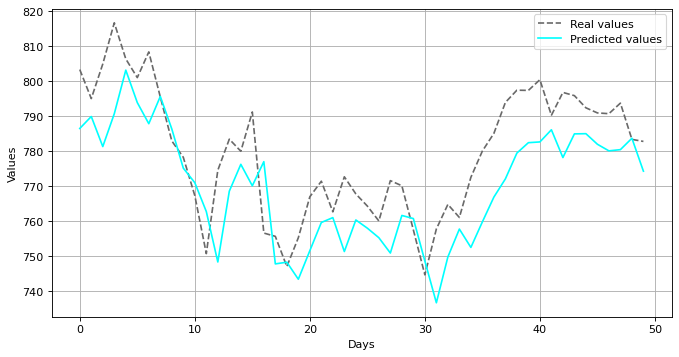

In [175]:
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(val[:, 0], color="DimGray", label="Real values", linestyle="dashed")
plt.plot(predicted_gru, color="Cyan", label="Predicted values")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()

In [176]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(
    GRU(units=50, 
        return_sequences=True, 
        input_shape=(timesteps, 1), 
        activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Second GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# The output layer
regressorGRU.add(Dense(units=1))

# fitting the model
regressorGRU.compile(loss='mean_squared_error', optimizer='sgd')
regressorGRU.fit(train_open_X, 
                 train_open_y, 
                 epochs = 100, 
                 batch_size = 8)

Epoch 1/100


/Users/luoguliu/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0729
Epoch 2/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0105
Epoch 3/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0059
Epoch 4/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0044
Epoch 5/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0040
Epoch 6/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0040
Epoch 7/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0042
Epoch 8/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0038
Epoch 9/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0037
Epoch 10/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0032
Epoch 11/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0035
Epoch 12/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0027
Epoch 13/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0031
Epoch 14/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0030
Epoch 15/100
145/145 ━━━━━━━━━━━━━━━━━━━━

145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0016
Epoch 80/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0018
Epoch 81/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0017
Epoch 82/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0015
Epoch 83/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0018
Epoch 84/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0017
Epoch 85/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0017
Epoch 86/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0017
Epoch 87/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0016
Epoch 88/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0016
Epoch 89/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0014
Epoch 90/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0016
Epoch 91/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0016
Epoch 92/100
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0016
Epoch 93/100
145/145 ━━━━━━━━━━━━

In [177]:
predicted_gru_sgd = regressorGRU.predict(val_open_X)
predicted_gru_sgd = scaler.inverse_transform(predicted_gru_sgd)
mean_squared_error(val[:, 0], predicted_gru_sgd)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


235.61593446435197

In [179]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(
    GRU(units=50, 
        return_sequences=True, 
        input_shape=(timesteps, 1), 
        activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Second GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# The output layer
regressorGRU.add(Dense(units=1))

# fitting the model
regressorGRU.compile(loss='mean_squared_error', optimizer='adam')
regressorGRU.fit(train_open_X, 
                 train_open_y, 
                 epochs = 200, 
                 batch_size = 4)

Epoch 1/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0101
Epoch 2/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0035
Epoch 3/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0031
Epoch 4/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0029
Epoch 5/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0023
Epoch 6/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0020
Epoch 7/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0027
Epoch 8/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0020
Epoch 9/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0018
Epoch 10/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0022
Epoch 11/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0020
Epoch 12/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0016
Epoch 13/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0012
Epoch 14/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0016
Epoch 15/200
290/290 ━━━━━━━━

290/290 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 9.3608e-04
Epoch 80/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 9.2891e-04
Epoch 81/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0011
Epoch 82/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0011
Epoch 83/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0010
Epoch 84/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0010
Epoch 85/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 9.8359e-04
Epoch 86/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0011
Epoch 87/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 9.5680e-04
Epoch 88/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 8.2406e-04
Epoch 89/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0010
Epoch 90/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0011
Epoch 91/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0010
Epoch 92/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0010
Epoch 93/200


290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 9.1475e-04
Epoch 156/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 9.2863e-04
Epoch 157/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0010
Epoch 158/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 7.9015e-04
Epoch 159/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 8.1396e-04
Epoch 160/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 9.0844e-04
Epoch 161/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 7.5834e-04
Epoch 162/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0011
Epoch 163/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 8.2503e-04
Epoch 164/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0010
Epoch 165/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0010
Epoch 166/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 8.7154e-04
Epoch 167/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 8.8967e-04
Epoch 168/200
290/290 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step

In [180]:
predicted_gru = regressorGRU.predict(val_open_X)
predicted_gru = scaler.inverse_transform(predicted_gru)
mean_squared_error(val[:, 0], predicted_gru)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


102.30848913339247

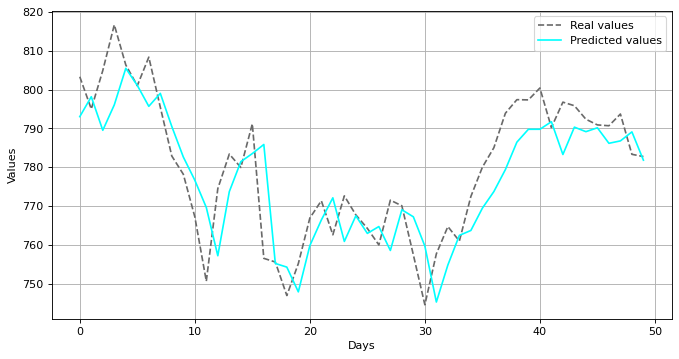

In [181]:
plt.figure(figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(val[:, 0], color="DimGray", label="Real values", linestyle="dashed")
plt.plot(predicted_gru, color="Cyan", label="Predicted values")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Values")
plt.grid(True)
plt.show()